In [1]:

from substructure_classifier.substructure_classifier_development import SubstructureClassifier
import json
example_config=SubstructureClassifier.get_example_classifier_config().copy()
print(json.dumps(example_config, indent=4))

example_config["classifier_name"]="simple_vit1"

# example_config["active_val_cats_live"]=[
#     ["SIS_10e10_sub_val_extended", "NoNoiseDataset", {
#         "grid_width_arcsec":6.0,
#         "grid_pixel_side":100,
#         "broadcasting":True
#     }

#     ],
#      ["SIS_10e9_sub_val_extended", "NoNoiseDataset", {
#         "grid_width_arcsec":6.0,
#         "grid_pixel_side":100,
#         "broadcasting":True
#     }

#     ]
# ]



example_config["NN_model"]="VisionTransformer"

# still very close to ResNet-50
example_config["NN_config"] = {
    "img_size":    100,
    "patch_size":  10,   # or 10 if you prefer patches that divide 100 exactly
    "in_channels": 1,
    "num_classes": 2,
    "embed_dim":   512,  # keeps you at ~25.3 M params
    "depth":       8,
    "num_heads":   8,
    "mlp_ratio":   4.0,
    "qkv_bias":    True,
    "drop_rate":   0.0,
}

my_classifier = SubstructureClassifier("simple_vit1", config_dict=example_config)






{
    "classifier_name": "test_classifier2",
    "NN_model": "ResNet50",
    "NN_config": {},
    "active_val_cats_live": [
        [
            "SIS_10e9_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ],
        [
            "SIS_10e8_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ]
    ]
}


In [ ]:
from substructure_classifier.training_stage_development import Stage
from substructure_classifier.substructure_classifier_development import SubstructureClassifier



example_config=Stage.get_example_config(return_config=True)
my_classifier=SubstructureClassifier("simple_vit5")

example_config["training_catalog"]="SIS_10e10_sub_train"
example_config["validation_like_train_catalog"]="SIS_10e10_sub_val_extended"
example_config["dataset_class_str"]="NoNoiseDataset"
example_config["dataset_config"]={
        "grid_width_arcsec":6.0,
        "grid_pixel_side":100,
        "broadcasting":False
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=1000
example_config["batch_size"]=32
example_config["jump_batch_val"]=30
example_config["learning_rate"]=0.001
example_config["epochs"]=2
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=False)



example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="SIS_10e10_sub_train"
example_config["validation_like_train_catalog"]="SIS_10e10_sub_val_extended"
example_config["dataset_class_str"]="NoNoiseDataset"
example_config["dataset_config"]={
        "grid_width_arcsec":6.0,
        "grid_pixel_side":100,
        "broadcasting":False
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=1000
example_config["batch_size"]=32
example_config["jump_batch_val"]=30
example_config["learning_rate"]=0.0002
example_config["epochs"]=2
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=False)



example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="SIS_10e9_sub_train"
example_config["validation_like_train_catalog"]="SIS_10e9_sub_val_extended"
example_config["dataset_class_str"]="NoNoiseDataset"
example_config["dataset_config"]={
        "grid_width_arcsec":6.0,
        "grid_pixel_side":100,
        "broadcasting":False
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=1000
example_config["batch_size"]=32
example_config["jump_batch_val"]=30
example_config["learning_rate"]=0.00005
example_config["epochs"]=2
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=False)




example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="SIS_10e8_sub_train"
example_config["validation_like_train_catalog"]="SIS_10e8_sub_val_extended"
example_config["dataset_class_str"]="NoNoiseDataset"
example_config["dataset_config"]={
        "grid_width_arcsec":6.0,
        "grid_pixel_side":100,
        "broadcasting":False
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=1000
example_config["batch_size"]=32
example_config["jump_batch_val"]=30
example_config["learning_rate"]=0.00001
example_config["epochs"]=2
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=False)



example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="big_conor_similar_training_cat"
example_config["validation_like_train_catalog"]="big_conor_similar_training_cat_val"
example_config["dataset_class_str"]="NoNoiseDataset"
example_config["dataset_config"]={
        "grid_width_arcsec":6.0,
        "grid_pixel_side":100,
        "broadcasting":False
}

example_config["samples_used_for_training"]=50000
example_config["samples_used_for_validation"]=1000
example_config["batch_size"]=32
example_config["jump_batch_val"]=30
example_config["learning_rate"]=0.000001
example_config["epochs"]=1
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=False)

forcing only one entry per catalog in add activ val cat live, substructure classifier dev
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog SIS_10e10_sub_val_extended already exists in active validation catalogs.
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Using device: cuda
Currently this dataloader is calculating the images in float32
curretly this dataloader implementing a random crop of the image as well as a rotation.
Model initialized with default random parameters
Using device: cuda
Currently this dataloader is calculating the images in float32
curretly this dataloader implementing a random crop of the image as well as a rotation.
Using device: cuda
Currently this dataloader is calculating the images in float32
curretly this dataloader implementing a random crop of the image as well as a rotation.
Using devic

Epoch 1/2:   0%|          | 0/125 [00:00<?, ?batch/s]

New best validation loss: 0.699981
New best validation loss: 0.693274
New best validation loss: 0.692779


Epoch 2/2:   0%|          | 0/125 [00:00<?, ?batch/s]

New best validation loss: 0.683564
Model parameters saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit5/stages/6dfede4f00839fb8b61a9abdc12cbc85e569b76ae33a60b66733468f90b5f07f/trained_params.pth
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Live metrics saved.
Loading paramters of the current stage, not the parent. This mode is intended for using an already trained stage for some evaluations
Training completed metrics saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit5/stages/6dfede4f00839fb8b61a9abdc12cbc85e569b76ae33a60b66733468f90b5f07f/training_completed_metrics.json
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog SIS_10e10_sub_train already exists in active validation catalogs.
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classi

Epoch 1/2:   0%|          | 0/125 [00:00<?, ?batch/s]

New best validation loss: 0.681837


Epoch 2/2:   0%|          | 0/125 [00:00<?, ?batch/s]

New best validation loss: 0.658764
Model parameters saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit5/stages/b0fabec70c472ffe11c51aef574ea2395166ac9e76ceda3cc7967cb56e4ba3d5/trained_params.pth
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Live metrics saved.
Loading paramters of the current stage, not the parent. This mode is intended for using an already trained stage for some evaluations
Training completed metrics saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit5/stages/b0fabec70c472ffe11c51aef574ea2395166ac9e76ceda3cc7967cb56e4ba3d5/training_completed_metrics.json
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog SIS_10e9_sub_val_extended already exists in active valida

Epoch 1/2:   0%|          | 0/125 [00:00<?, ?batch/s]

New best validation loss: 0.726141
New best validation loss: 0.717562
New best validation loss: 0.682616


Epoch 2/2:   0%|          | 0/125 [00:00<?, ?batch/s]

Model parameters saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit5/stages/b7cfb2ad98693ae1c005cc969b4dbc127bc81ecdee66879bb4d079dcfd7dd166/trained_params.pth
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Live metrics saved.
Loading paramters of the current stage, not the parent. This mode is intended for using an already trained stage for some evaluations
Training completed metrics saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit5/stages/b7cfb2ad98693ae1c005cc969b4dbc127bc81ecdee66879bb4d079dcfd7dd166/training_completed_metrics.json
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
should have updated the classifier config file
Implement the device compatibility check in _check_re

Epoch 1/2:   0%|          | 0/125 [00:00<?, ?batch/s]

New best validation loss: 0.704258
New best validation loss: 0.693104


Epoch 2/2:   0%|          | 0/125 [00:00<?, ?batch/s]

New best validation loss: 0.692856
New best validation loss: 0.692497
Model parameters saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit5/stages/f371e42fe73cd8361231181a6cd0ba5f94b3832a18fc082443b80a658679b0c8/trained_params.pth
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Live metrics saved.
Loading paramters of the current stage, not the parent. This mode is intended for using an already trained stage for some evaluations
Training completed metrics saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit5/stages/f371e42fe73cd8361231181a6cd0ba5f94b3832a18fc082443b80a658679b0c8/training_completed_metrics.json
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
should have updated the classi

Epoch 1/1:   0%|          | 0/1563 [00:00<?, ?batch/s]

New best validation loss: 0.738716
New best validation loss: 0.708092
New best validation loss: 0.703527
New best validation loss: 0.696788
New best validation loss: 0.679592
New best validation loss: 0.676247
New best validation loss: 0.669095
New best validation loss: 0.668830
New best validation loss: 0.668768
New best validation loss: 0.667820


In [1]:
from substructure_classifier.training_stage_development import Stage
from substructure_classifier.substructure_classifier_development import SubstructureClassifier


example_config=Stage.get_example_config(return_config=True)
my_classifier=SubstructureClassifier("simple_vit5")


example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="big_conor_similar_training_cat"
example_config["validation_like_train_catalog"]="big_conor_similar_training_cat_val"
example_config["dataset_class_str"]="SingleTelescopeNoiseDataset"
example_config["dataset_config"]={
        "grid_width_arcsec":6.0,
        "grid_pixel_side":100,
        "broadcasting":False,
        "sky_level":0.05,
        "kernel_size":5,
        "kernel_sigma":1.0,
        "gain":100.0,
        "final_transform": True
}

example_config["samples_used_for_training"]=50000
example_config["samples_used_for_validation"]=1000
example_config["batch_size"]=32
example_config["jump_batch_val"]=30
example_config["learning_rate"]=0.000001
example_config["epochs"]=1
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=True)

forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog big_conor_similar_training_cat already exists in active validation catalogs.
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog big_conor_similar_training_cat_val already exists in active validation catalogs.
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Using device: cuda
Currently this dataloader is calculating the images in float32
[DEBUG] parent_stage_id = 'f371e42fe73cd8361231181a6cd0ba5f94b3832a18fc082443b80a658679b0c8'
[DEBUG] loading checkpoint from '/raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit5/stages/f371e42fe73cd8361231181a6cd0ba5f94b3832a18fc082443b80a658679b0c8/trained_params.pth'
[DEBUG] before load: ‖cls_token‖ = 0.402335
[DEBUG] after load:  ‖cls_token‖ = 0.465727
Using device: cuda


Epoch 1/1:   0%|          | 0/1563 [00:00<?, ?batch/s]

Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

/raven/u/fcitterio/master_thesis_code/src/deep_learning/NN_datasets/custom_datasets/no_noise_dataset.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor((num_sub > 0)).to(device=self.device).long()


Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set final_transform in the intialization to True to use it
Currently not cropping and rotating, set

TrainingCompletedMetrics(accuracy={}, f1_score={}, precision={}, recall={})

Right now considering only selection by catalog and not by dataset in plotting in substructure_classifier_development.py
running loss plot for the training catalogs
Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf


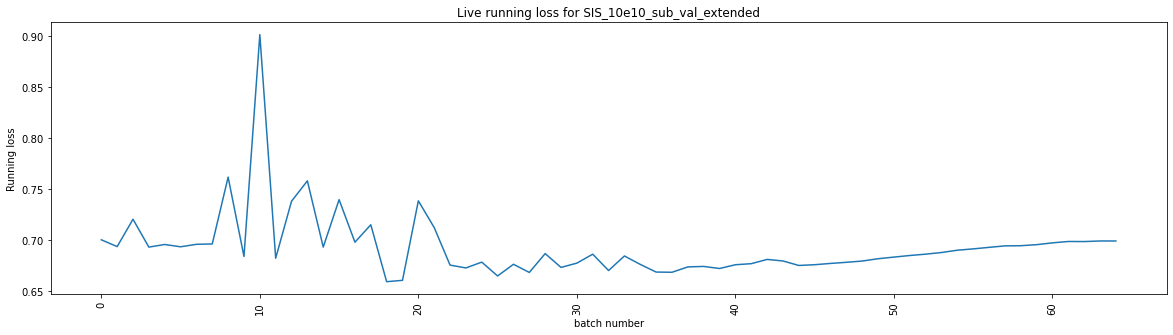

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf


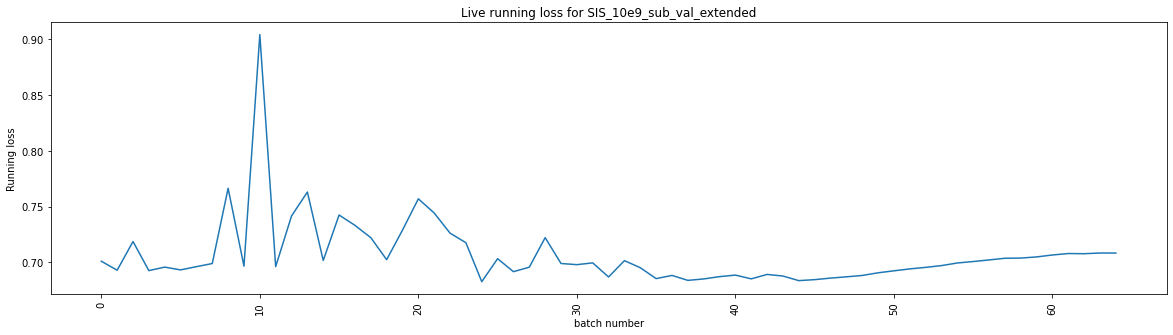

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf


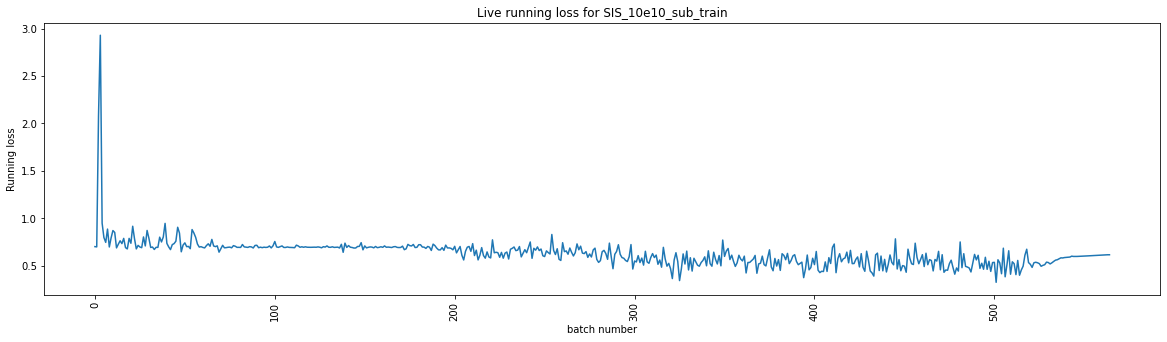

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf


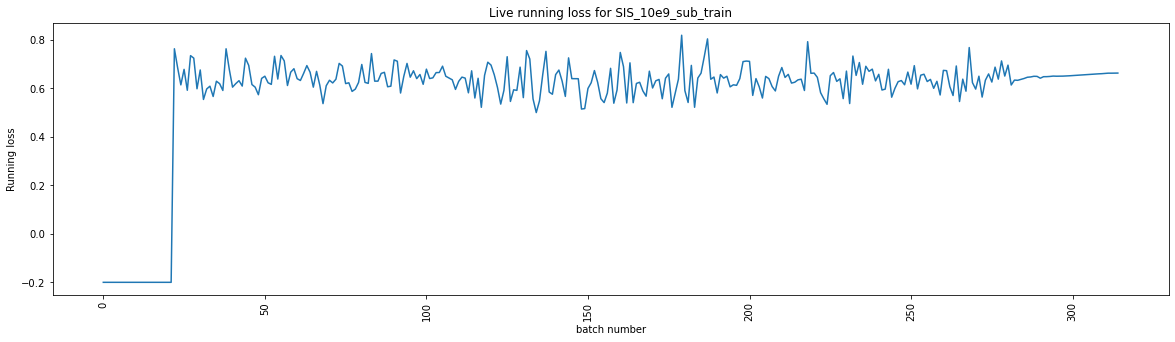

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf


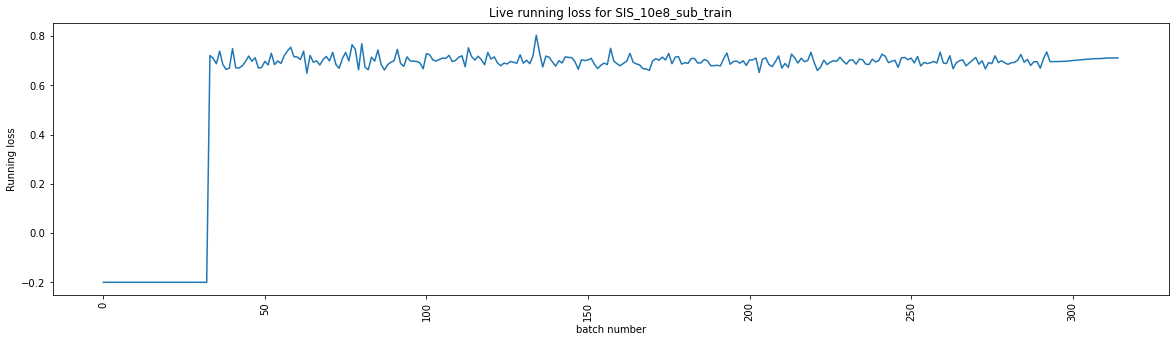

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf


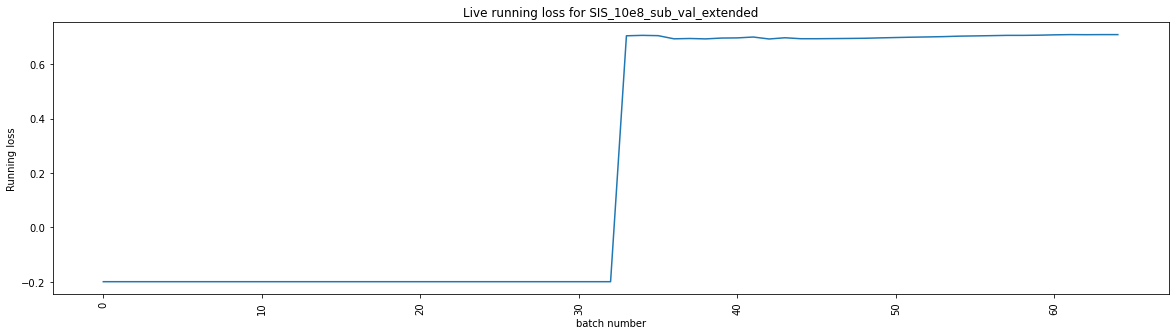

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf


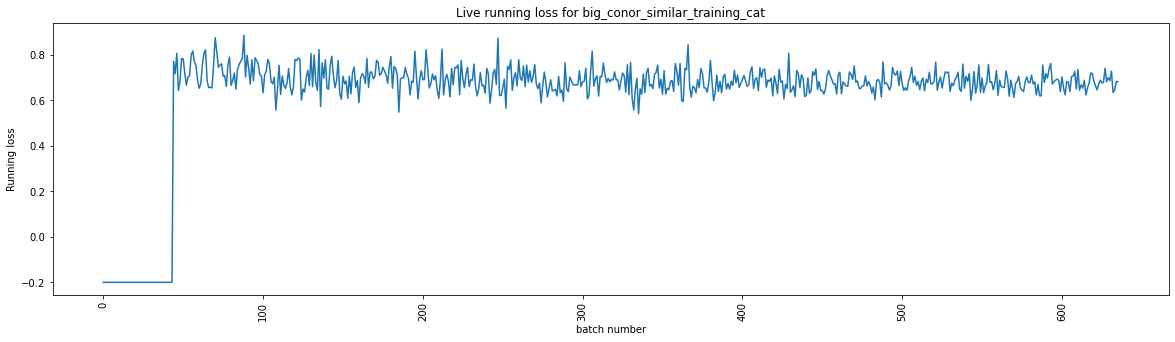

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf


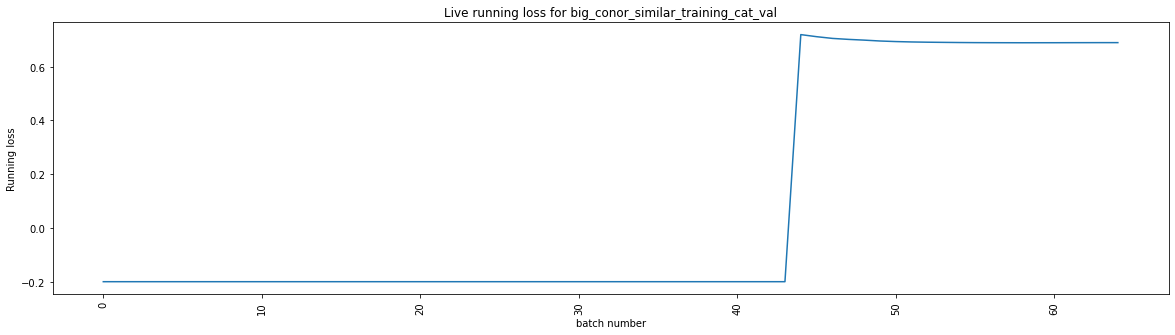

hard coded shown metrics at _plot_concatedated_data in substructure_classifier_development.py
Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metr

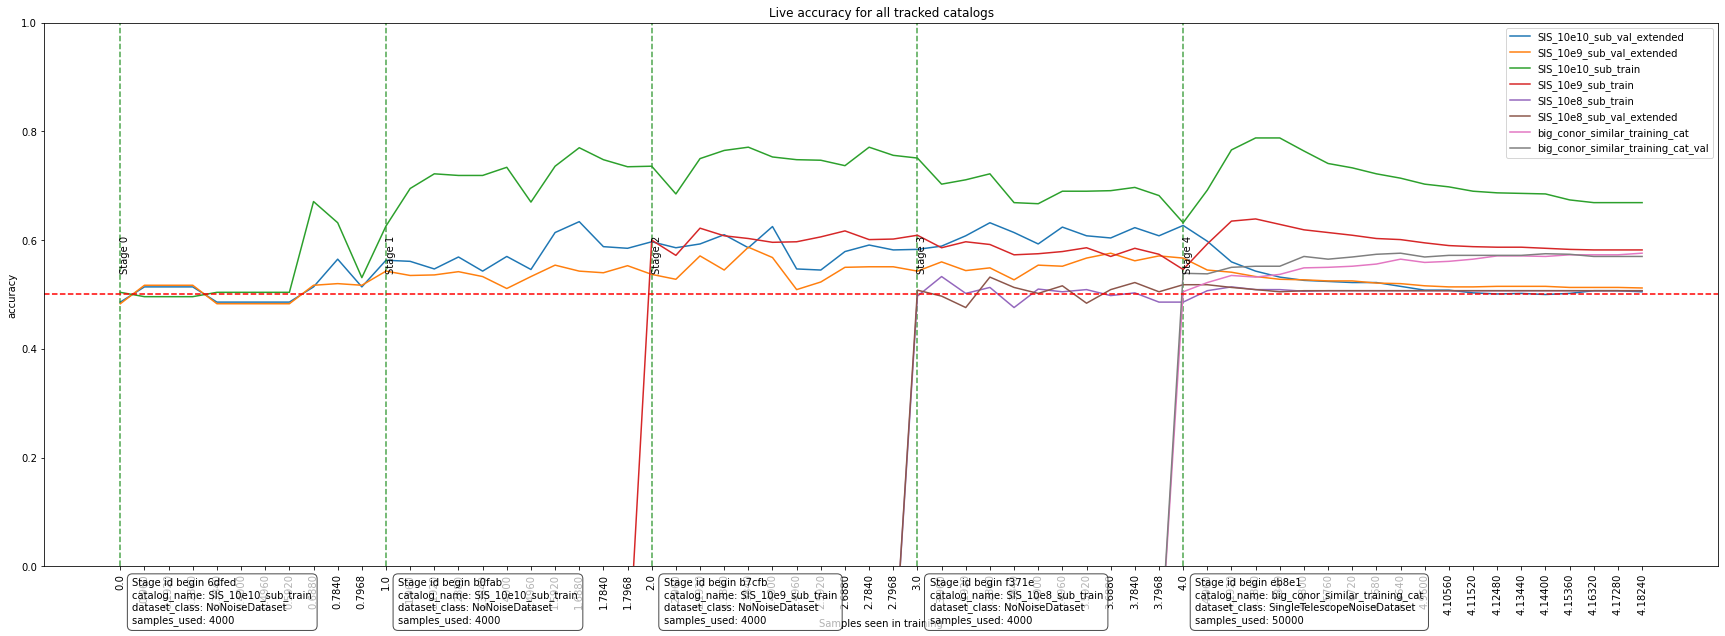

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live 

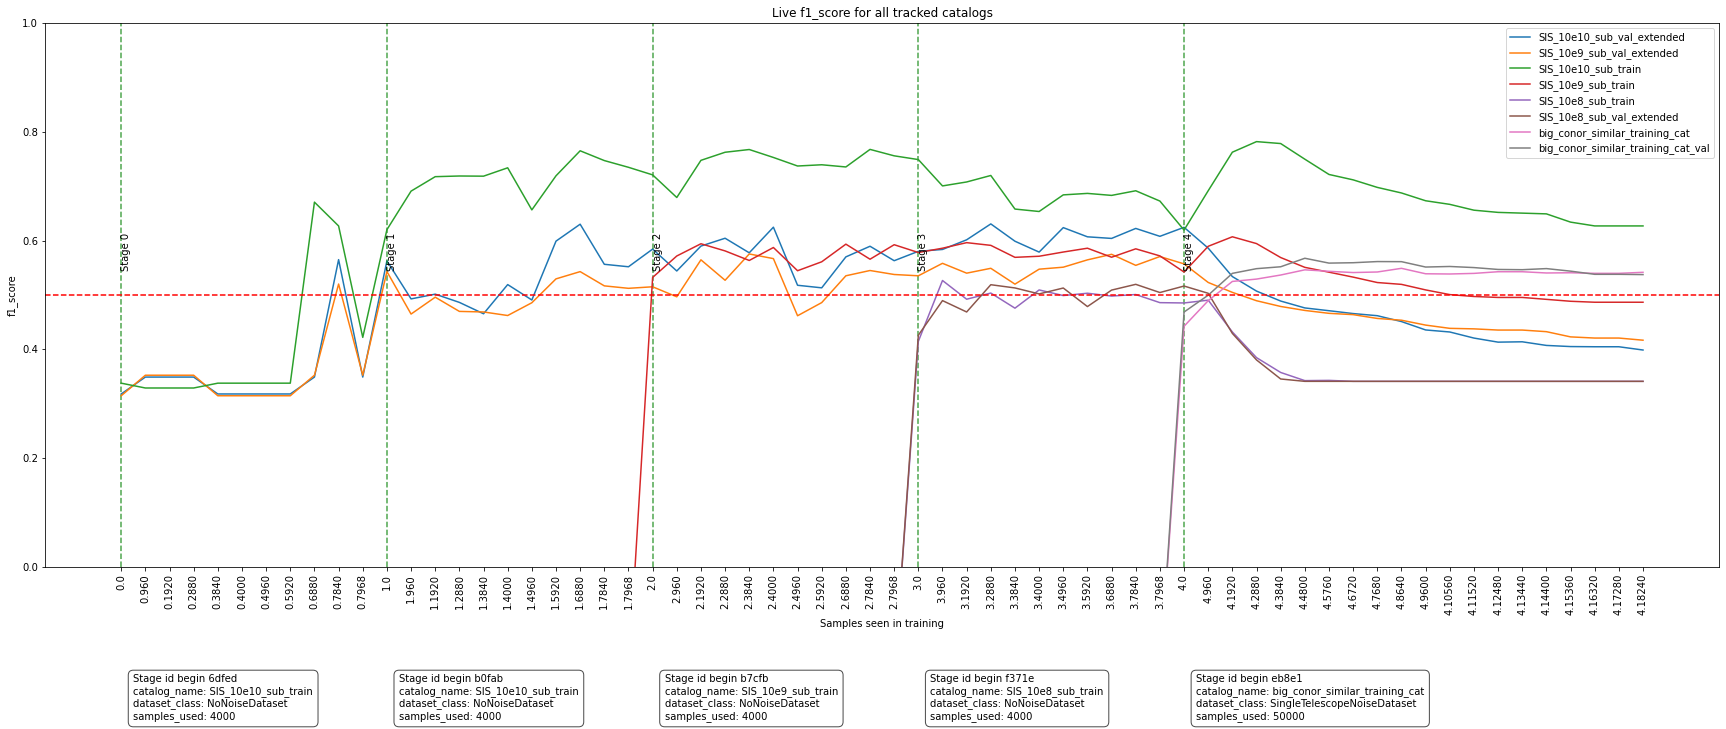

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live 

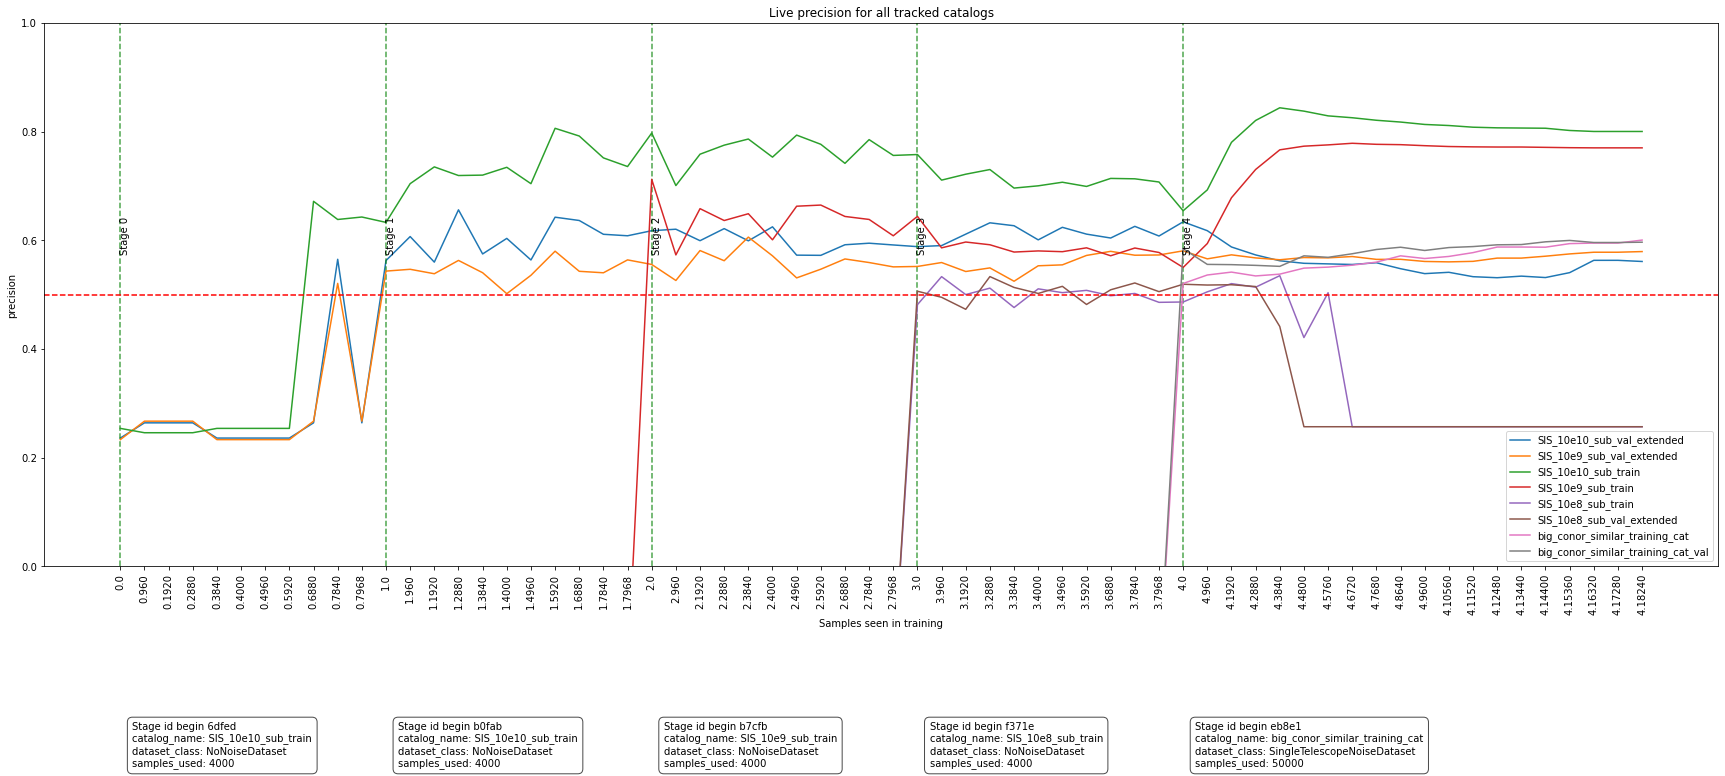

Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Offline metrics not found for stage c52091891e9061438efd64b46cdcda88e45a5d757707ea0727e7f6babe529da0
Live metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Offline metrics not found for stage ffe148d783182f764405c2e62dcdee20795f43afc13211fed6e44568067acedf
Live metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Offline metrics not found for stage 7983fe9b31a4ee635716a3ab8b70beb8f488c0fd95fba7963e1259643b6015fe
Live 

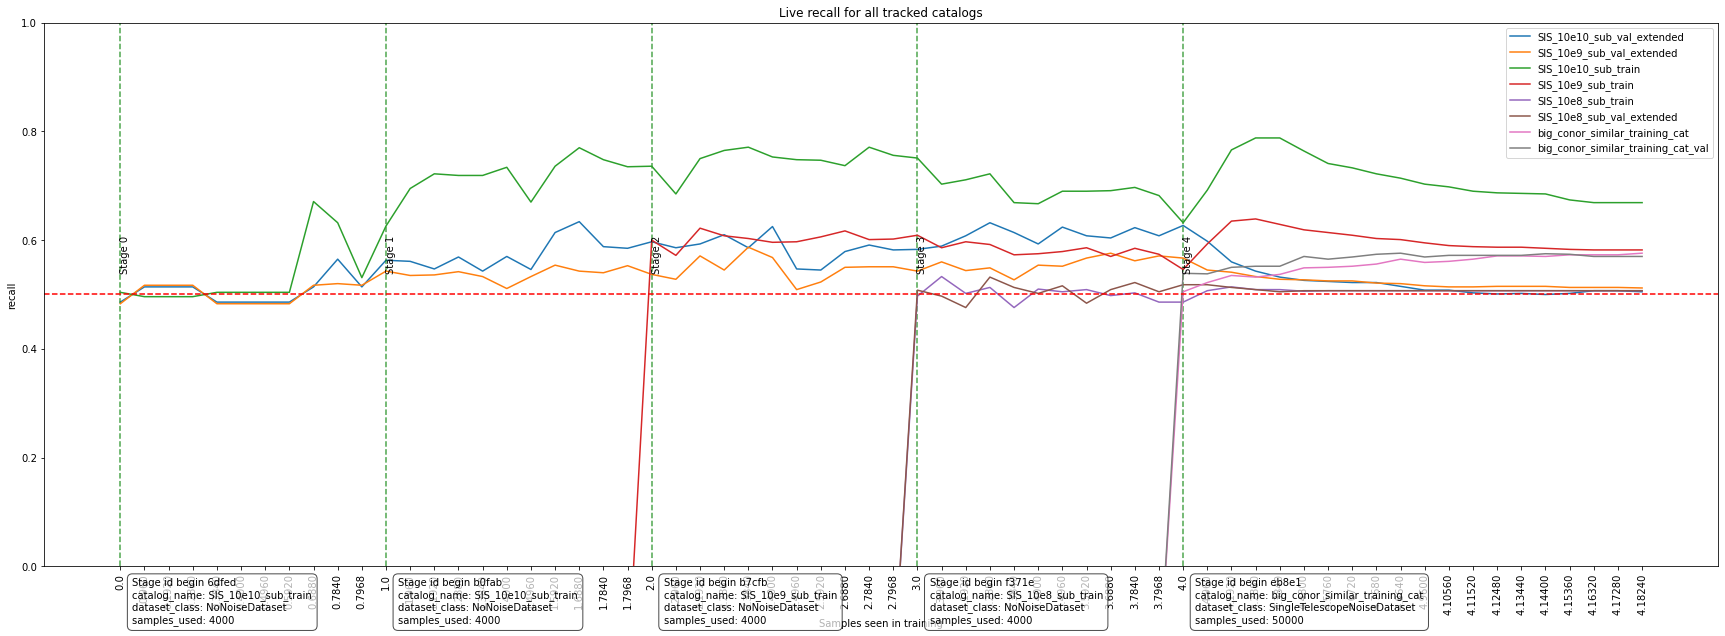

In [2]:
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier(classifier_name="simple_vit5")
my_classifier._plot_concatenated_data()

In [4]:
example_config["samples_used_for_training"]=2000
example_config["samples_used_for_validation"]=1000
example_config["batch_size"]=128
example_config["jump_batch_val"]=7
example_config["learning_rate"]=0.000001
example_config["epochs"]=1
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=False)

example_config["samples_used_for_training"]=50000
example_config["samples_used_for_validation"]=1000
example_config["batch_size"]=128
example_config["jump_batch_val"]=7
example_config["learning_rate"]=0.000001
example_config["epochs"]=1
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=False)

forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog big_conor_similar_training_cat already exists in active validation catalogs.
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog big_conor_similar_training_cat_val already exists in active validation catalogs.
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Using device: cuda
Currently this dataloader is calculating the images in float32
curretly this dataloader implementing a random crop of the image as well as a rotation.
[DEBUG] parent_stage_id = 'a0c9fd24b799e602b5e45bea82f0f0686a55a776d0d4a41034df1158bc71e2e9'
[DEBUG] loading checkpoint from '/raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit1/stages/a0c9fd24b799e602b5e45bea82f0f0686a55a776d0d4a41034df1158bc71e2e9/trained_params.pth'
[DEBUG] before load

Epoch 1/1:   0%|          | 0/16 [00:00<?, ?batch/s]

New best validation loss: 0.705634
New best validation loss: 0.696502
Final model is best with loss 0.688789
Model parameters saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit1/stages/93c5ebc67642d6be9f5b7e9010cdbaafcdf146aa80009dcb7b3c15b941813c03/trained_params.pth
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Live metrics saved.
Loading paramters of the current stage, not the parent. This mode is intended for using an already trained stage for some evaluations
Training completed metrics saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit1/stages/93c5ebc67642d6be9f5b7e9010cdbaafcdf146aa80009dcb7b3c15b941813c03/training_completed_metrics.json
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
Catalog big_conor_similar_training_cat already exists in active validation catalogs.
should have updated the classifier config f

Epoch 1/1:   0%|          | 0/391 [00:00<?, ?batch/s]

New best validation loss: 0.693122
New best validation loss: 0.689735
New best validation loss: 0.687096
New best validation loss: 0.681522
New best validation loss: 0.681360
New best validation loss: 0.678397
New best validation loss: 0.666713
New best validation loss: 0.666228
Model parameters saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit1/stages/11c15f597da597b273e886c8b4160c949b8b367b1972a2ad8ff5c954107047f2/trained_params.pth
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Live metrics saved.
Loading paramters of the current stage, not the parent. This mode is intended for using an already trained stage for some evaluations
Training completed metrics saved to /raven/u/fcitterio/master_thesis_code/trained_classifiers/simple_vit1/stages/11c15f597da597b273e886c8b4160c949b8b367b1972a2ad8ff5c954107047f2/training_completed_metrics.json


TrainingCompletedMetrics(accuracy={}, f1_score={}, precision={}, recall={})

Right now considering only selection by catalog and not by dataset in plotting in substructure_classifier_development.py
running loss plot for the training catalogs


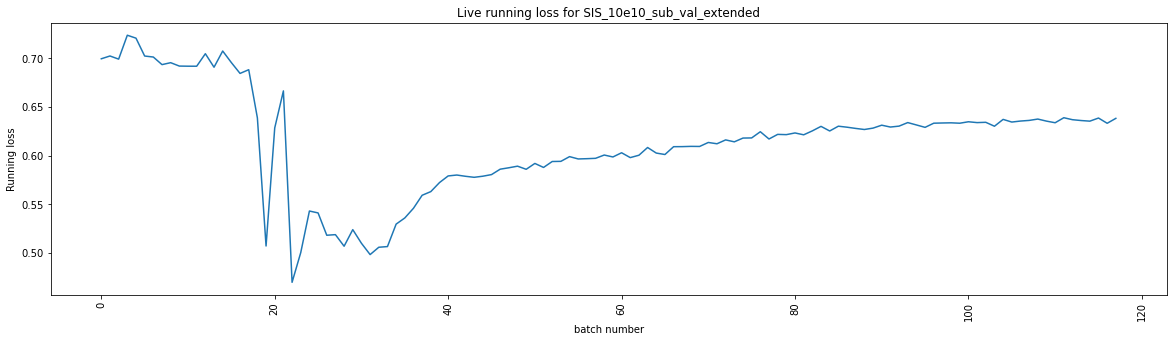

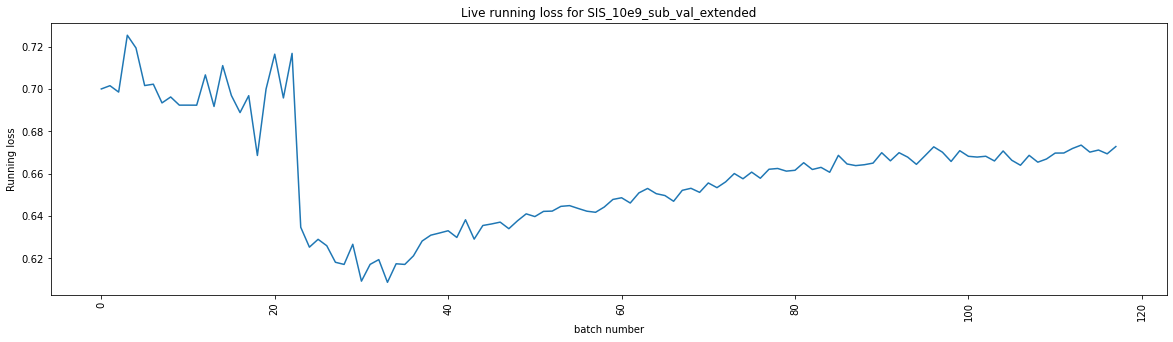

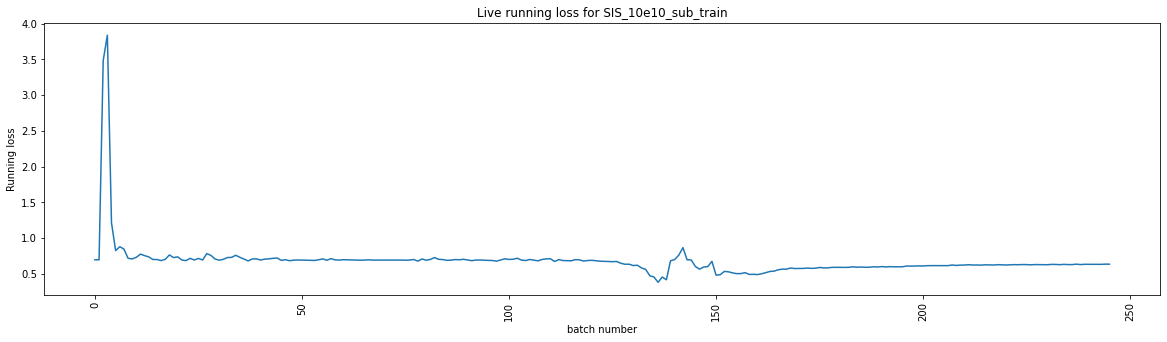

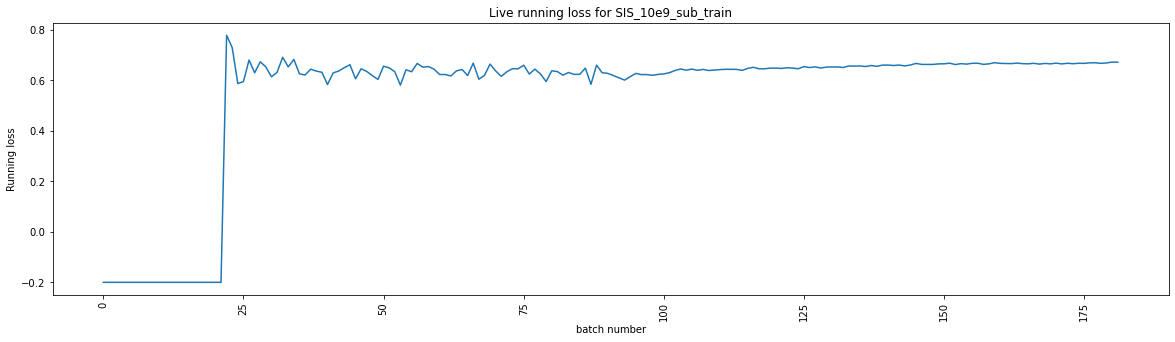

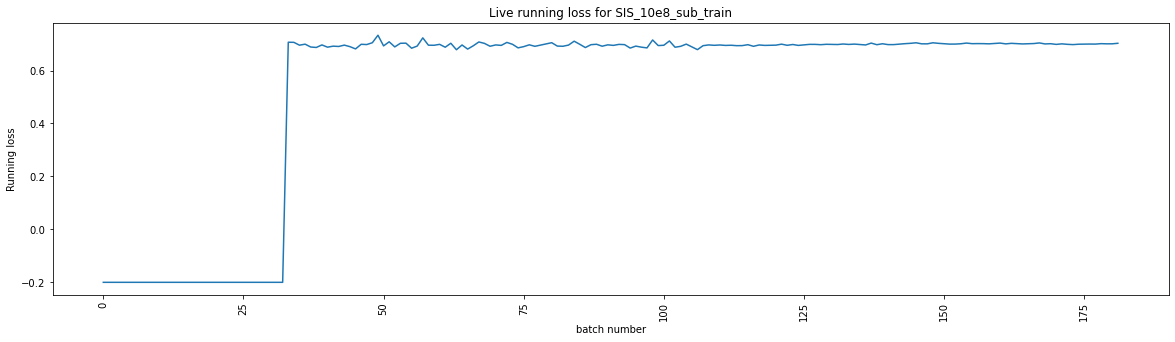

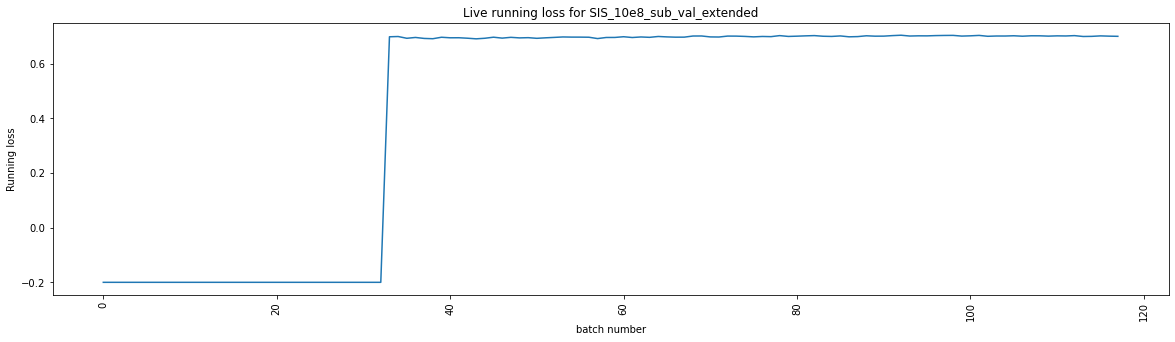

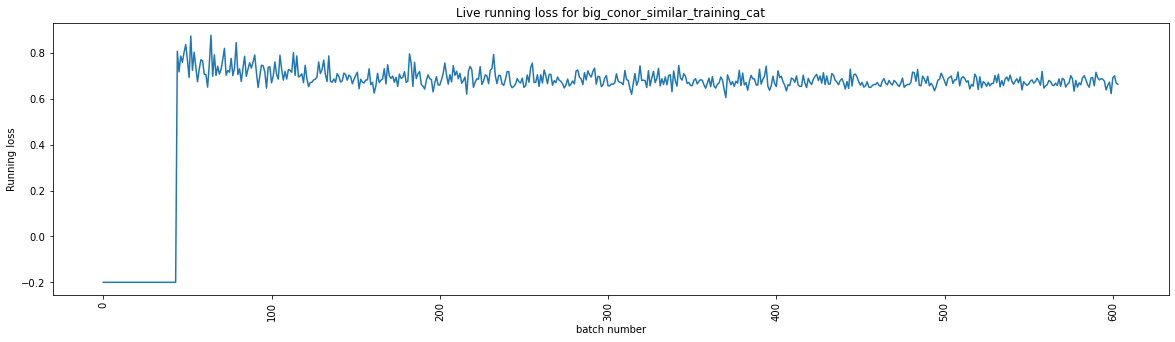

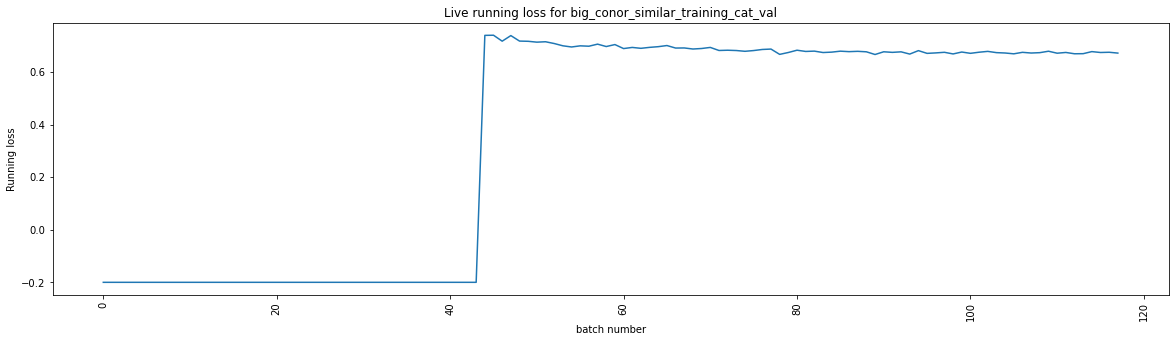

hard coded shown metrics at _plot_concatedated_data in substructure_classifier_development.py


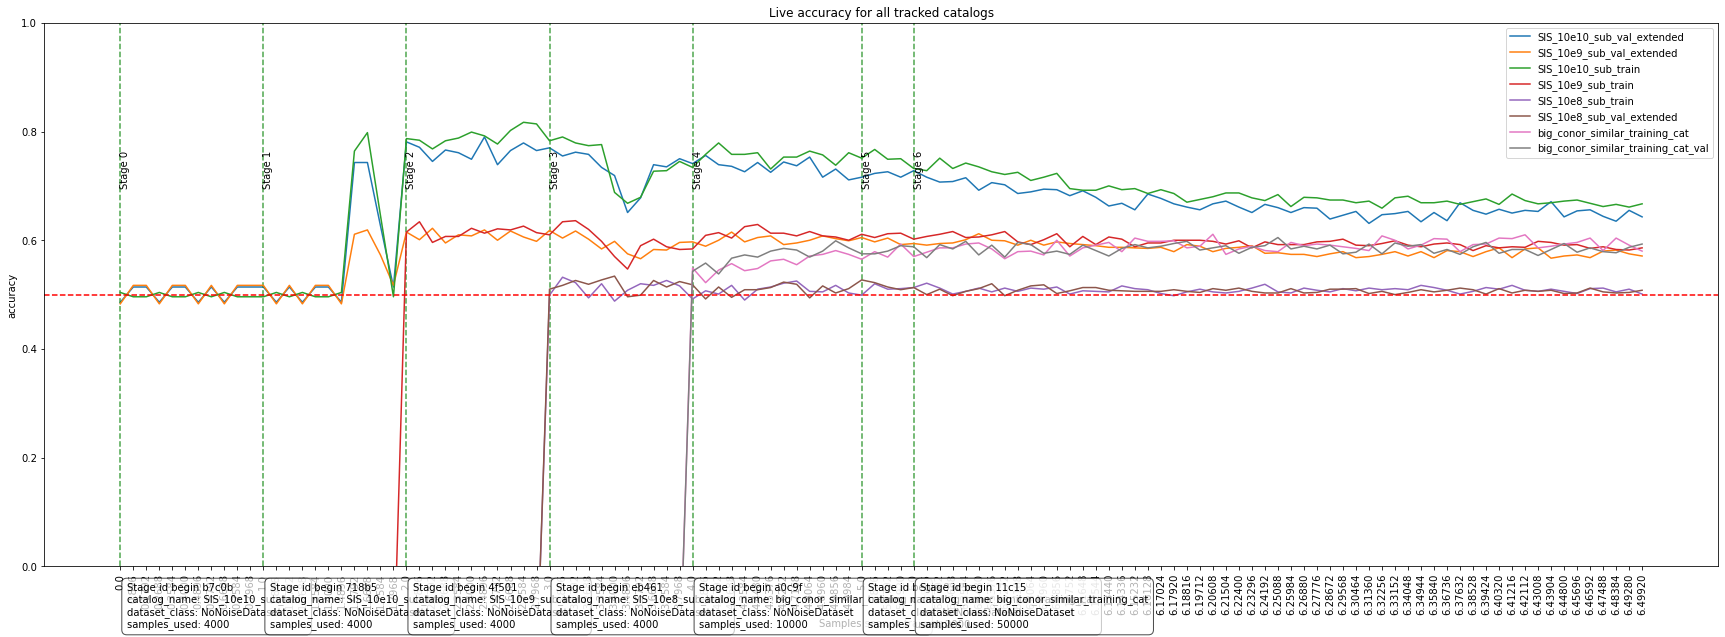

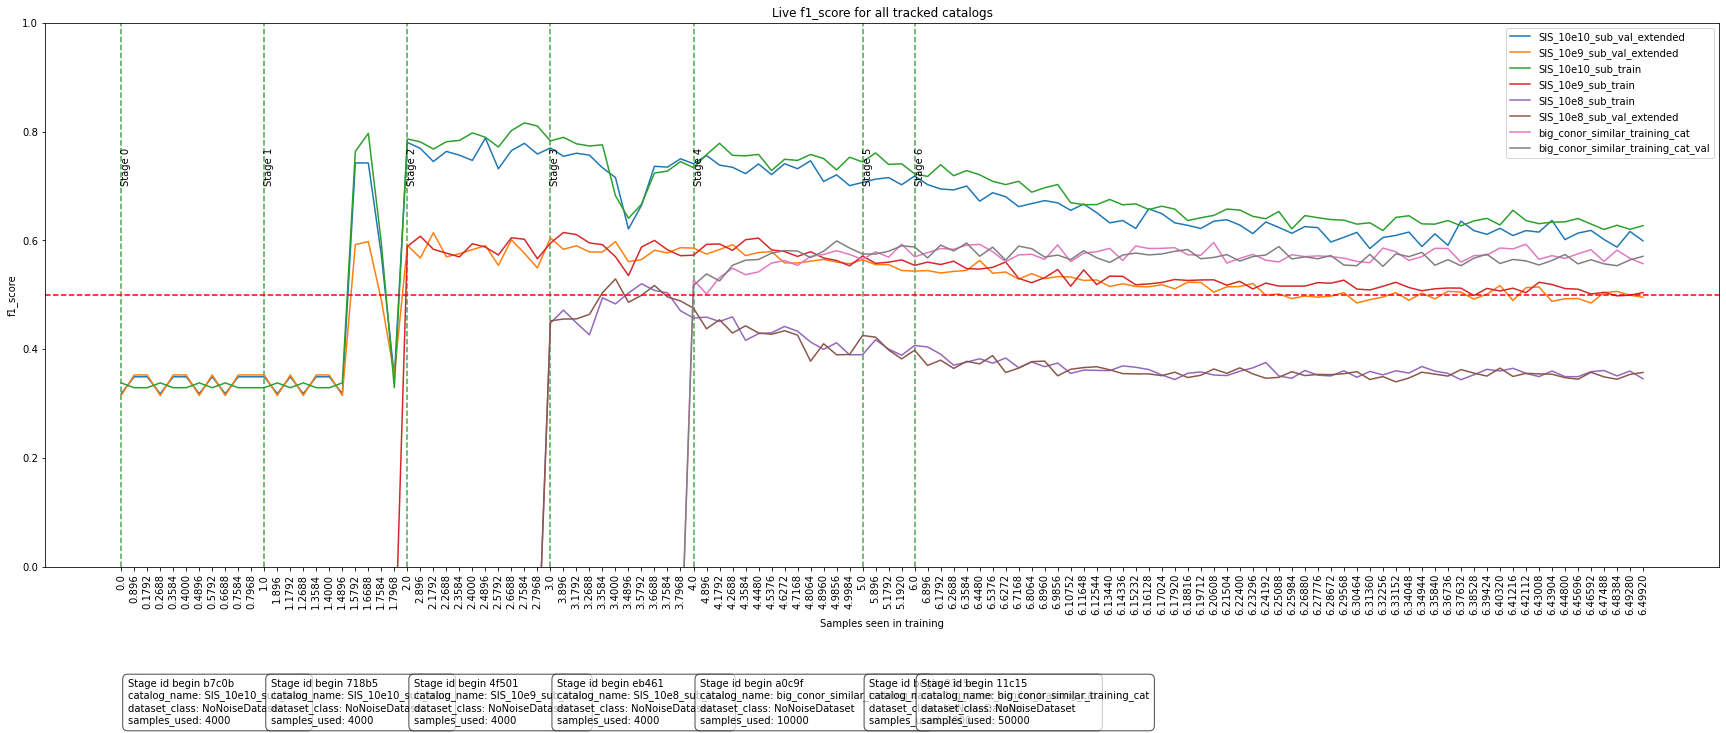

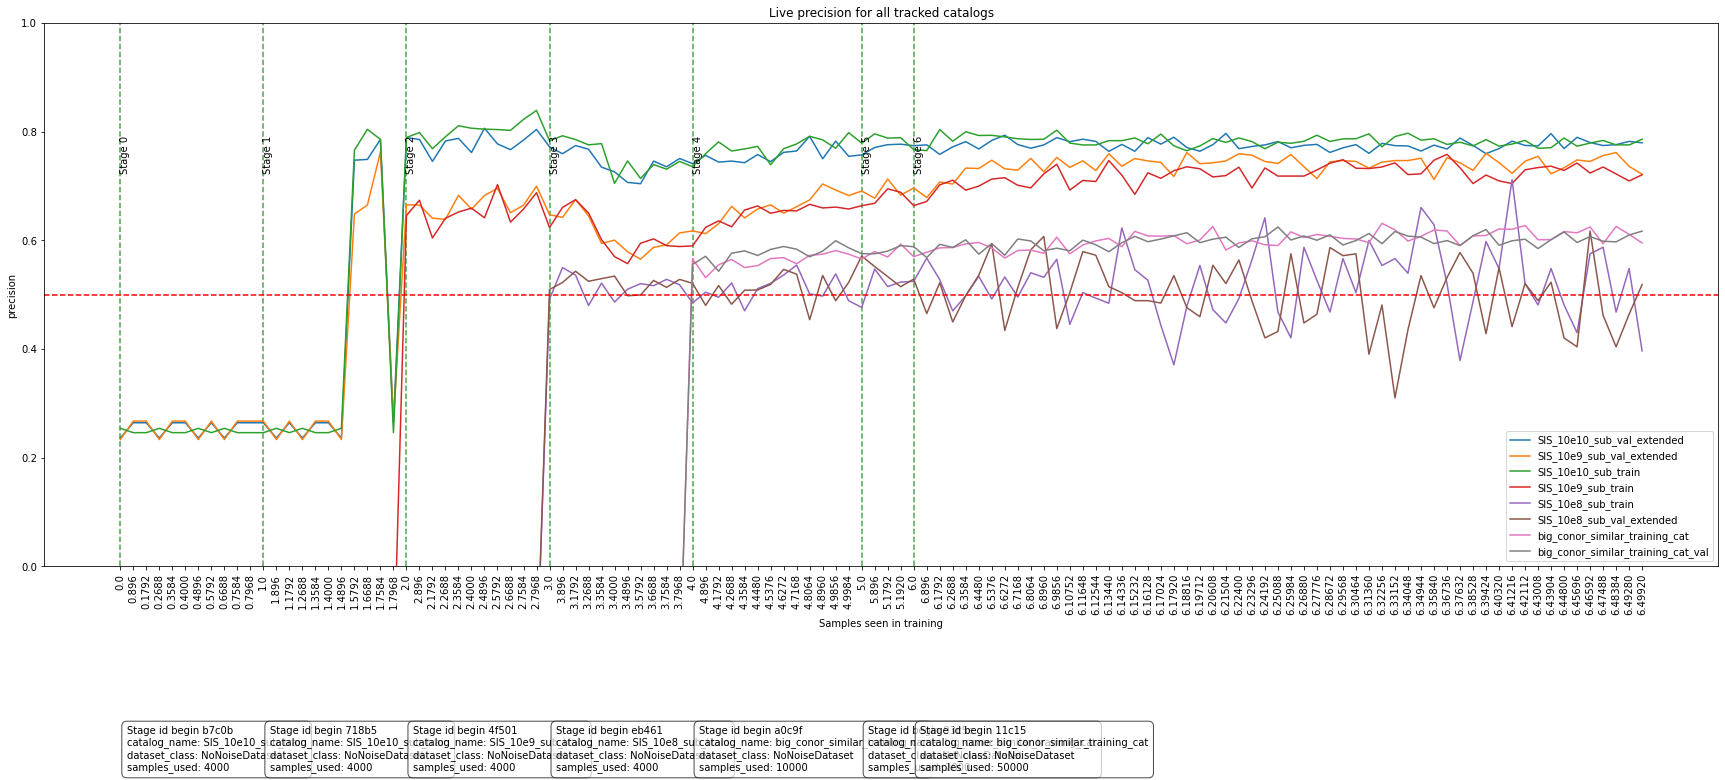

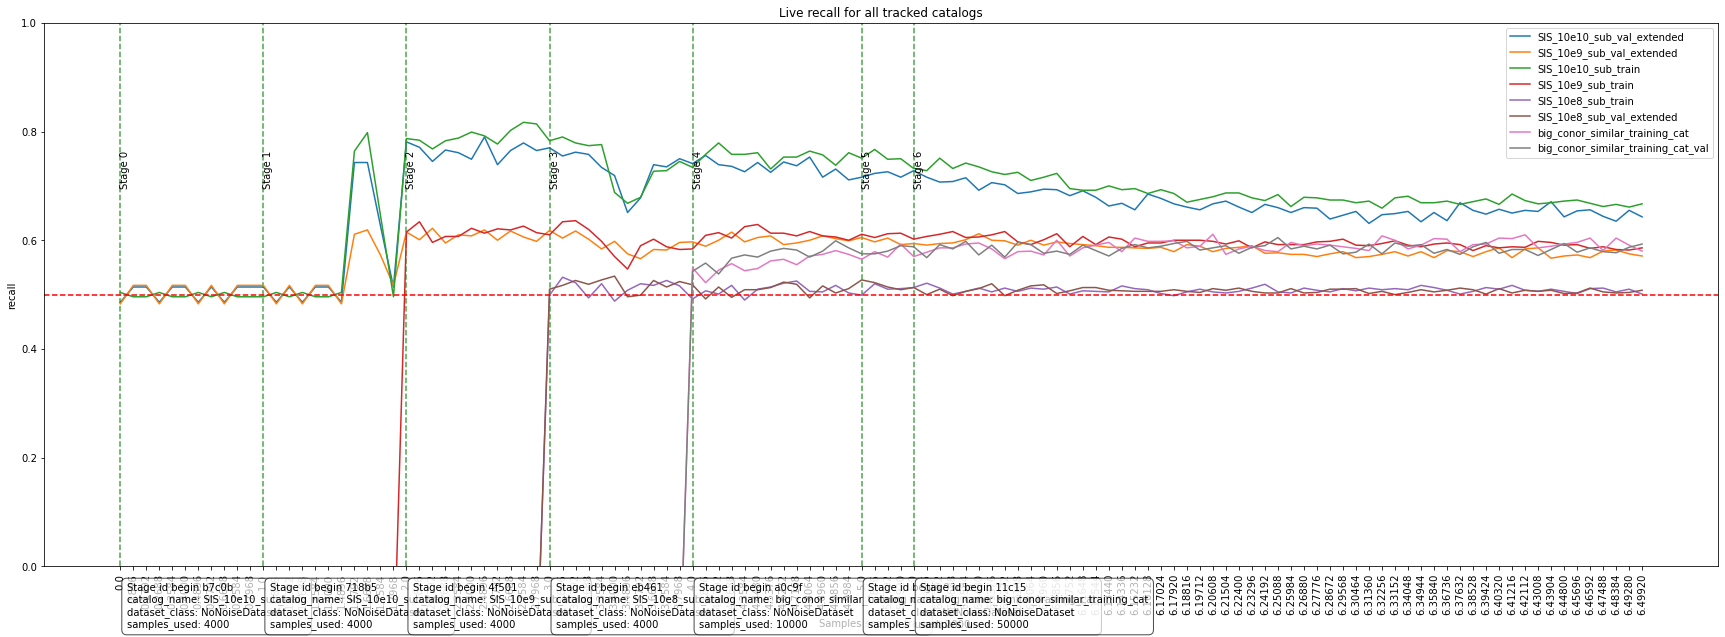

In [5]:
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier(classifier_name="simple_vit1")
my_classifier._plot_concatenated_data()